# Initial Supervised Learning Modeling

_Authors: Taylor Simpson_

---

## Contents

[1. Data Preparation for Beauty Yelp Category](#1.-Data-Preparation) <br>
[2. Pre-Processing and Modeling for Beauty Yelp Category](#2.-Pre-Processing-and-Modeling) <br>
[3. Conceptual Understanding and Evaluation for Beauty Yelp Category](#3.-Evaluation-and-Conceptual-Understanding) <br>
[4. Hotels Yelp Category](#4.-Hotels-Yelp-Category)<br>
[5. Nightlife Yelp Category](#5.-Nightlife-Yelp-Category)<br>
[6. Restaurants Yelp Category](#6.-Restaurants-Yelp-Category)<br>
[7. Shopping Yelp Category](#7.-Shopping-Yelp-Category)<br>




### 1. Data Preparation

In [27]:
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [15]:
#Read in Yelp Beauty Data CSV
beauty = pd.read_csv('../data/aggregate_beauty.csv')

### 2. Pre-Processing and Modeling

In [16]:
#Set X and Y variables 
X = beauty[['one_dollar', 'two_dollar', 'three_dollar', 'four_dollar']]
y = beauty['city_median_household_income']

In [17]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
#Instantiate Beauty Linear Regression Model(BM)
beauty_model = LinearRegression()

In [19]:
#Fit BM
beauty_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3. Evaluation and Conceptual Understanding

In [28]:
#Evaluate BM - not good!
beauty_model.score(X_train, y_train)

0.2228735866827779

In [21]:
#Set predictions
y_predict = beauty_model.predict(X_test)

In [29]:
#Evaluate predicts for BM - not good 
beauty_model.score(X_test, y_test)

-0.08773371599120217

In [23]:
#Evaluate BM coefficients - not much connection between them. 
beauty_model.coef_

array([-185.41348708,   71.27210145, -150.26990788, -570.84890385])

Text(0.5, 0, 'Beauty Hotels')

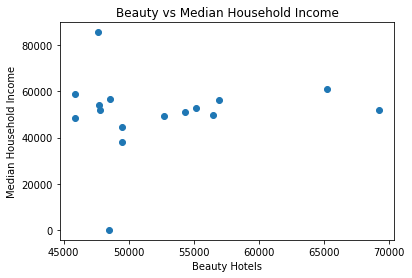

In [30]:
#Plotted Actual vs Predictions
plt.scatter(y_predict, y_test)
plt.title('Beauty vs Median Household Income')
# y label
plt.ylabel('Median Household Income')
# x label
plt.xlabel('Beauty Hotels')

In [31]:
#Ran summary stats for BM predicts - 3/4 extremely high P-values shows that we are failing to reject the null hypothesis that there is no statistically significant effect of our X variables on Neighborhood Affluence
beauty_model_sum = sm.OLS(y_train, X_train).fit()

# Print out the statistics
beauty_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     city_median_household_income   R-squared:                       0.868
Model:                                      OLS   Adj. R-squared:                  0.851
Method:                           Least Squares   F-statistic:                     50.90
Date:                          Thu, 01 Aug 2019   Prob (F-statistic):           3.43e-13
Time:                                  18:29:28   Log-Likelihood:                -394.42
No. Observations:                            35   AIC:                             796.8
Df Residuals:                                31   BIC:                             803.1
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one_dollar     151.6814    236.911      0.640      0.527    -331.502     634.865
two_dollar     126.8721     47.582      2.666      0.012      29.828     223.916
three_dollar  -151.1850    371.288     -0.407      0.687    -908.432     606.062
four_dollar   1645.2541   1179.526      1.395      0.173    -760.406    4050.914
==============================================================================
Omnibus:                        4.324   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.267
Skew:                           0.739   Prob(JB):                        0.195
Kurtosis:                       3.231   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Hotels Yelp Category 

0.13983707774131482
0.10823083984568517
[  -81.869397      24.76295684   330.6970053  -1608.29881521]


Text(0.5, 0, 'Yelp Hotels')

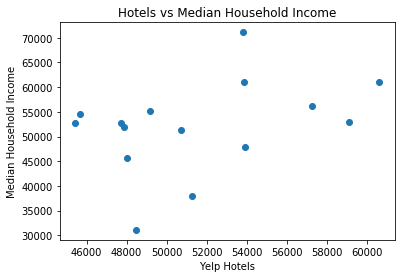

In [37]:
#Read in CSV, Set X and Y variables, train/test split, instantiate model, fit modelhotels
hotel_model = LinearRegression()
Xh = hotels[['one_dollar', 'two_dollar', 'three_dollar', 'four_dollar']]
yh = hotels['city_median_household_income']
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(Xh, yh, test_size=0.3)
hotel_model.fit(X_train_h, y_train_h)
print(hotel_model.score(X_train_h, y_train_h))
y_predict_h = hotel_model.predict(X_test_h)
print(hotel_model.score(X_test_h, y_test_h))
print(hotel_model.coef_)
import matplotlib.pyplot as plt
plt.scatter(y_predict_h, y_test_h)
plt.title('Hotels vs Median Household Income')
# y label
plt.ylabel('Median Household Income')
# x label
plt.xlabel('Yelp Hotels')
#Evaluated model scores - both weak
#Evaluated coefficients - little connection between all 4. 

In [38]:
#Ran summary stats for Hotel Model predicts - 4/4 extremely high P-values shows that we are failing to reject the null hypothesis that there is no statistically significant effect of our X variables on Neighborhood Affluence
hotel_model_sum = sm.OLS(y_train_h, X_train_h).fit()

# Print out the statistics
hotel_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     city_median_household_income   R-squared:                       0.776
Model:                                      OLS   Adj. R-squared:                  0.748
Method:                           Least Squares   F-statistic:                     26.92
Date:                          Thu, 01 Aug 2019   Prob (F-statistic):           1.07e-09
Time:                                  18:31:57   Log-Likelihood:                -404.21
No. Observations:                            35   AIC:                             816.4
Df Residuals:                                31   BIC:                             822.6
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one_dollar     629.8177    720.498      0.874      0.389    -839.648    2099.284
two_dollar     172.0327    178.617      0.963      0.343    -192.258     536.323
three_dollar   518.6844    504.275      1.029      0.312    -509.791    1547.159
four_dollar   -999.0252   2980.146     -0.335      0.740   -7077.074    5079.023
==============================================================================
Omnibus:                        1.959   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.798
Skew:                           0.469   Prob(JB):                        0.407
Kurtosis:                       2.404   Cond. No.                         88.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Nightlife Yelp Category 

0.08240491267421413
-0.016611837388665007
[-114.00687339   24.25349933   58.01470025 -464.1089361 ]


Text(0.5, 0, 'Yelp Nightlife')

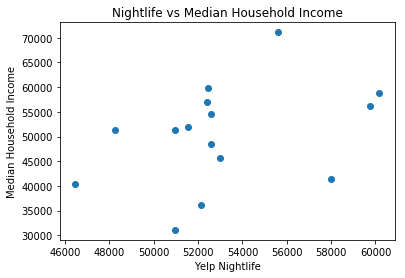

In [39]:
#Read in CSV, Set X and Y variables, train/test split, instantiate nightlife models, fit nightlife models
nightlife = pd.read_csv('../data/aggregate_nightlife.csv')
nightlife_model = LinearRegression()
Xn = nightlife[['one_dollar', 'two_dollar', 'three_dollar', 'four_dollar']]
yn = nightlife['city_median_household_income']
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(Xn, yn, test_size=0.3)
nightlife_model.fit(X_train_n, y_train_n)
print(nightlife_model.score(X_train, y_train))
y_predict_n = nightlife_model.predict(X_test_n)
print(nightlife_model.score(X_test, y_test))
print(nightlife_model.coef_)
import matplotlib.pyplot as plt
plt.scatter(y_predict_n, y_test_n)
plt.title('Nightlife vs Median Household Income')
# y label
plt.ylabel('Median Household Income')
# x label
plt.xlabel('Yelp Nightlife')
#Evaluated model scores - both weak
#Evaluated coefficients - little connection between all 4. 

In [40]:
#Ran summary stats for BM predicts - 3/4 extremely high P-values shows that we are failing to reject the null hypothesis that there is no statistically significant effect of our X variables on Neighborhood Affluence
nightlife_model_sum = sm.OLS(y_train_n, X_train_n).fit()

#Print out the statistics
nightlife_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     city_median_household_income   R-squared:                       0.778
Model:                                      OLS   Adj. R-squared:                  0.749
Method:                           Least Squares   F-statistic:                     27.17
Date:                          Thu, 01 Aug 2019   Prob (F-statistic):           9.59e-10
Time:                                  18:32:09   Log-Likelihood:                -404.54
No. Observations:                            35   AIC:                             817.1
Df Residuals:                                31   BIC:                             823.3
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one_dollar     139.4649    127.261      1.096      0.282    -120.086     399.016
two_dollar     124.0051     56.718      2.186      0.036       8.329     239.682
three_dollar    10.5679    555.726      0.019      0.985   -1122.844    1143.979
four_dollar    717.2475   2041.398      0.351      0.728   -3446.212    4880.707
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.414
Skew:                           0.643   Prob(JB):                        0.299
Kurtosis:                       2.974   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6. Restaurants Yelp Category 

-0.5884759303091252
-0.6009970140171925
[-118.12136528    6.94140031 -237.27039688  454.3109488 ]


Text(0.5, 0, 'Yelp Restaurants')

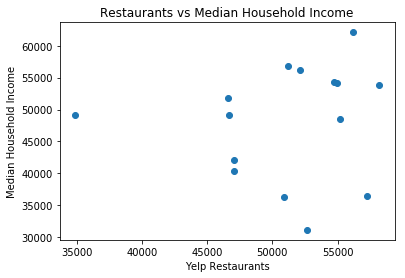

In [41]:
#Read in CSV, Set X and Y variables, train/test split, instantiate restaurants models, fit restaurants models
restaurants = pd.read_csv('../data/aggregate_restaurants.csv')
restaurants_model = LinearRegression()
Xr = restaurants[['one_dollar', 'two_dollar', 'three_dollar', 'four_dollar']]
yr = restaurants['city_median_household_income']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, yr, test_size=0.3)
restaurants_model.fit(X_train_r, y_train_r)
print(restaurants_model.score(X_train, y_train))
y_predict_r = restaurants_model.predict(X_test_r)
print(restaurants_model.score(X_test, y_test))
print(restaurants_model.coef_)
import matplotlib.pyplot as plt
plt.scatter(y_predict_r, y_test_r)
plt.title('Restaurants vs Median Household Income')
# y label
plt.ylabel('Median Household Income')
# x label
plt.xlabel('Yelp Restaurants')
#Evaluated model scores - both weak
#Evaluated coefficients - little connection between all 4. 

In [42]:
#Ran summary stats for BM predicts - 2/4 extremely high P-values shows that we are failing to reject the null hypothesis that there is no statistically significant effect of our X variables on Neighborhood Affluence
restaurant_model_sum = sm.OLS(y_train_r, X_train_r).fit()

# Print out the statistics
restaurant_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     city_median_household_income   R-squared:                       0.923
Model:                                      OLS   Adj. R-squared:                  0.913
Method:                           Least Squares   F-statistic:                     92.99
Date:                          Thu, 01 Aug 2019   Prob (F-statistic):           8.31e-17
Time:                                  18:32:17   Log-Likelihood:                -386.61
No. Observations:                            35   AIC:                             781.2
Df Residuals:                                31   BIC:                             787.4
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one_dollar     182.7687     53.656      3.406      0.002      73.337     292.201
two_dollar      85.8938     31.956      2.688      0.011      20.719     151.069
three_dollar    80.3816    274.584      0.293      0.772    -479.637     640.400
four_dollar    519.5108    701.720      0.740      0.465    -911.656    1950.678
==============================================================================
Omnibus:                        1.311   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                0.863
Skew:                           0.384   Prob(JB):                        0.650
Kurtosis:                       2.984   Cond. No.                         95.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. Shopping Yelp Category 

0.008769929732016846
0.04893940548252318
[-134.96627121   53.74439849   44.35002661  168.09406139]


Text(0.5, 0, 'Yelp Shopping')

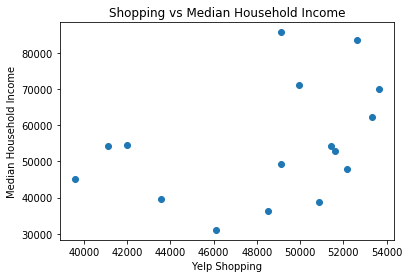

In [43]:
#Read in CSV, Set X and Y variables, train/test split, instantiate shopping models, fit shopping models
shopping = pd.read_csv('../data/aggregate_shopping.csv')
shopping_model = LinearRegression()
Xs = shopping[['one_dollar', 'two_dollar', 'three_dollar', 'four_dollar']]
ys = shopping['city_median_household_income']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, ys, test_size=0.3)
shopping_model.fit(X_train_s, y_train_s)
print(shopping_model.score(X_train, y_train))
y_predict_s = shopping_model.predict(X_test_s)
print(shopping_model.score(X_test, y_test))
print(shopping_model.coef_)
import matplotlib.pyplot as plt
plt.scatter(y_predict_s, y_test_s)
plt.title('Shopping vs Median Household Income')
# y label
plt.ylabel('Median Household Income')
# x label
plt.xlabel('Yelp Shopping')
#Evaluated model scores - both weak
#Evaluated coefficients - little connection between all 4. 

In [44]:
#Ran summary stats for BM predicts - 4/4 extremely high P-values shows that we are failing to reject the null hypothesis that there is no statistically significant effect of our X variables on Neighborhood Affluenceshopping_model_sum = sm.OLS(ys, Xs).fit()
predictions = shopping_model.predict(Xs) # make the predictions by the model

# Print out the statistics
shopping_model_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     city_median_household_income   R-squared:                       0.887
Model:                                      OLS   Adj. R-squared:                  0.877
Method:                           Least Squares   F-statistic:                     91.84
Date:                          Thu, 01 Aug 2019   Prob (F-statistic):           1.33e-21
Time:                                  18:32:24   Log-Likelihood:                -571.17
No. Observations:                            51   AIC:                             1150.
Df Residuals:                                47   BIC:                             1158.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
one_dollar      98.0420    239.143      0.410      0.684    -383.052     579.136
two_dollar      62.6888     51.207      1.224      0.227     -40.327     165.705
three_dollar   292.6413    183.235      1.597      0.117     -75.980     661.262
four_dollar    502.6143    712.737      0.705      0.484    -931.227    1936.455
==============================================================================
Omnibus:                        3.734   Durbin-Watson:                   2.310
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.023
Skew:                           0.592   Prob(JB):                        0.221
Kurtosis:                       3.140   Cond. No.                         83.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""